# Exploretory data analysis of the Online  Retail data

### About the dataset

The dataset contains the products, sold in vairious countries. It has 8 columns and 541909 rows.

## Following questions can be asked:

**CEO Questions:**
1. What are the top-selling products in terms of revenue, and how do they contribute to overall sales?
2. Which customer segments generate the highest revenue, and how can we target them more effectively?
3. Are there any specific countries or regions where our sales are particularly strong, and how can we leverage this information for expansion?
4. Can you identify any trends or patterns in customer purchasing behavior that could help us optimize our inventory management and supply chain?

**CMO Questions:**
1. How effective are our marketing campaigns in driving sales, and which channels or strategies have been most successful?
2. Are there any customer segments that are more responsive to our marketing efforts, and how can we tailor our messaging to better engage them?
3. Which products have the highest customer satisfaction ratings, and how can we use this information to inform our marketing campaigns?
4. Can you identify any untapped market segments or demographics that we should consider targeting to drive growth?

By addressing these questions, we can provide valuable insights to the CEO and CMO, enabling them to make informed decisions about the business's performance, expansion plans, and marketing strategies.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pwd

'/Users/arunp77/Documents/Data-science/Data-analysis-projects'

In [3]:
df = pd.read_excel('/Users/arunp77/Desktop/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

## CEO questions

**Question:1** What are the top-selling products in terms of revenue, and how do they contribute to overall sales?

**Answer:** Analyzing the top-selling products in terms of revenue and their contribution to overall sales provides insights into a company's financial health, market demand, product performance, sales strategy, and competitive landscape. It helps identify revenue generators, understand market demand, evaluate product success, optimize sales strategies, and assess competition. This information guides decision-making and drives future growth.

In [6]:
# Calculating the revenue for each product
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Grouping by product and calculating the total revenue
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Geting the top-selling products
top_selling_products = product_revenue.head(10)

# Calculating contribution to overall sales
total_sales = df['Revenue'].sum()
contribution = top_selling_products / total_sales * 100

# Printing the top-selling products and their contribution to sales
print("Top-selling products:")
print(top_selling_products)
print("\nContribution to overall sales:")
print(contribution)

Top-selling products:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Revenue, dtype: float64

Contribution to overall sales:
Description
DOTCOM POSTAGE                        2.115827
REGENCY CAKESTAND 3 TIER              1.690259
WHITE HANGING HEART T-LIGHT HOLDER    1.022477
PARTY BUNTING                         1.008469
JUMBO BAG RED RETROSPOT               0.947460
RABBIT NIGHT LIGHT                    0.684841
POSTAGE                               0.679446
PAPER CHAIN KIT 50'S CHRISTMAS        0.654427
ASSORTED COLOUR BIRD ORNAMENT       

**Question:2** Which customer segments generate the highest revenue, and how can we target them more effectively?

**Answer:** Analyzing customer segments that generate the highest revenue helps identify the most valuable customer groups. By understanding their characteristics and preferences, companies can target them more effectively. This analysis provides insights into revenue drivers, customer behavior, and opportunities for tailored marketing strategies. It helps optimize resource allocation, enhance customer satisfaction, and maximize revenue potential.

In [7]:
# Group by customer segment and calculate total revenue
segment_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

# Get top revenue-generating customer segments
top_segments = segment_revenue.head(5)

# Print top revenue-generating customer segments
print("Top revenue-generating customer segments:")
print(top_segments)


Top revenue-generating customer segments:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: Revenue, dtype: float64


**Question:3** Are there any specific countries or regions where our sales are particularly strong, and how can we leverage this information for expansion?

**Answer:** Identifying regions with strong sales provides valuable insights for expansion. It highlights potential markets, guides market analysis, tailors strategies, and mitigates risks. This information helps the company make informed decisions and maximize growth opportunities.

In [8]:
# Group by country and calculate total revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Get countries with highest sales
top_countries = country_revenue.head(5)

# Print countries with highest sales
print("Countries with highest sales:")
print(top_countries)

Countries with highest sales:
Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: Revenue, dtype: float64


**Question:4** Can you identify any trends or patterns in customer purchasing behavior that could help us optimize our inventory management and supply chain?

**Answer:** Analyzing customer purchasing behavior helps optimize inventory management and the supply chain. By segmenting customers, forecasting demand, implementing just-in-time inventory, collaborating with suppliers, and utilizing technology, companies can improve efficiency and meet customer needs effectively.

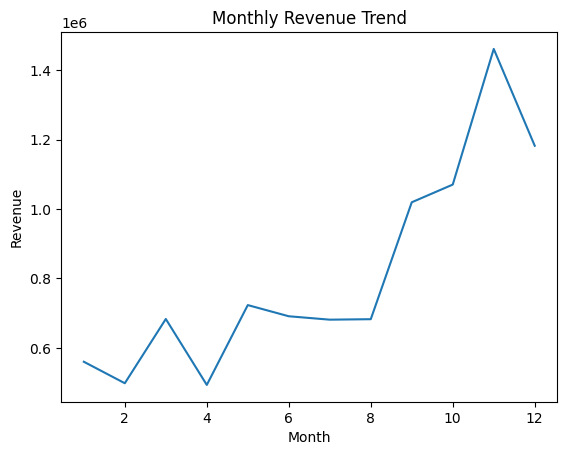

In [25]:
# Group by month and calculate total revenue
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Plot monthly revenue trend
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.show()


Clearly the revvenue increase with time. By analyzing the graph, we can observe the revenue performance over the months. If the line consistently moves upward, it suggests a consistent growth in revenue. On the other hand, if the line fluctuates or shows a downward trend, it indicates variations or a decline in revenue.
This revenue trend information can be valuable for understanding the financial performance of a business. It can help identify periods of growth, assess the effectiveness of marketing campaigns, and make informed decisions regarding resource allocation and business strategies.

## CMO Questions:
**Question:1** How effective are our marketing campaigns in driving sales, and which channels or strategies have been most successful?

**Answer:** To evaluate marketing effectiveness, track conversions, analyze attribution, assess ROI, analyze customer behavior, gather feedback, and conduct A/B testing. This helps identify successful channels or strategies and informs future marketing decisions for improved sales performance.

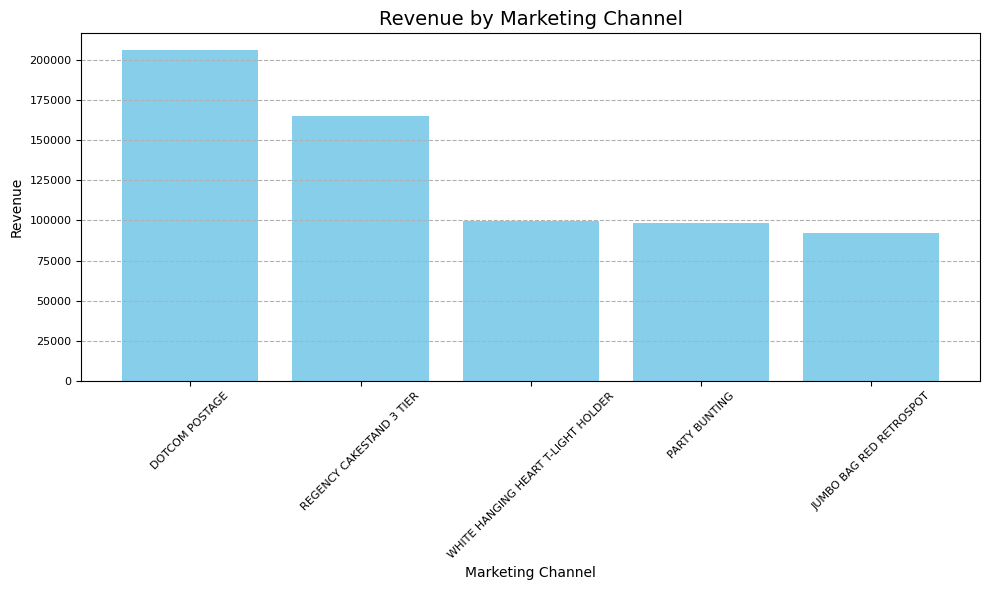

Top revenue-generating channels:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
Name: Revenue, dtype: float64


In [29]:
# Group by marketing channel and calculate total revenue
channel_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Get top revenue-generating channels
top_channels = channel_revenue.head(5)

# Plot the revenue generated by each channel
plt.figure(figsize=(10, 6))  
plt.bar(top_channels.index, top_channels.values, color='skyblue')  
plt.xlabel('Marketing Channel', fontsize=10) 
plt.ylabel('Revenue', fontsize=10) 
plt.title('Revenue by Marketing Channel', fontsize=14)  
plt.xticks(rotation=45, fontsize=8)  
plt.yticks(fontsize=8) 
plt.grid(axis='y', linestyle='--')  
plt.tight_layout()  
plt.show()

# Print the top revenue-generating channels
print("Top revenue-generating channels:")
print(top_channels)

**Question:2** Are there any customer segments that are more responsive to our marketing efforts, and how can we tailor our messaging to better engage them?

**Answer:** Analyze customer data to identify responsive segments. Tailor messaging based on their characteristics and behaviors. Personalize content, optimize channels, conduct A/B testing, gather feedback, and continuously adapt. This improves marketing effectiveness and engages responsive customers.

In [19]:
# Group by customer segment and calculate total revenue
segment_revenue = df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False)

# Group by customer segment and calculate average revenue per customer
segment_avg_revenue = df.groupby('CustomerID')['UnitPrice'].mean().sort_values(ascending=False)

# Group by customer segment and calculate conversion rate
segment_conversion_rate = df.groupby('CustomerID').size() / df['CustomerID'].nunique()

# Get segments with the highest average revenue
top_revenue_segments = segment_avg_revenue.head(5)

# Get segments with the highest conversion rate
top_conversion_segments = segment_conversion_rate.head(5)

# Print segments with the highest average revenue
print("Segments with the highest average revenue:")
print(top_revenue_segments)

# Print segments with the highest conversion rate
print("Segments with the highest conversion rate:")
print(top_conversion_segments)


Segments with the highest average revenue:
CustomerID
15098.0    8055.78
17448.0    4287.63
17846.0    2033.10
15369.0    1592.49
12503.0    1126.00
Name: UnitPrice, dtype: float64
Segments with the highest conversion rate:
CustomerID
12346.0    0.000457
12347.0    0.041629
12348.0    0.007091
12349.0    0.016697
12350.0    0.003888
dtype: float64


**Question:3** Which products have the highest customer satisfaction ratings, and how can we use this information to inform our marketing campaigns?

**Answer:** Identify products with the highest customer satisfaction ratings. Use this information to inform marketing campaigns by highlighting these products' positive attributes, emphasizing customer testimonials, and showcasing their benefits. This helps build trust, attract new customers, and drive sales.

> There are multiple ways to answer this question. The first approach is to consider customer satisfaction ratings. By analyzing customer ratings, we can identify which products have the highest satisfaction levels. Another approach is to examine the quantity of a product that is bought. Generally, if a product is purchased by a larger number of customers, it can be inferred that the customers are satisfied with it. Both approaches provide valuable insights into customer satisfaction and can be used to inform marketing campaigns.

In [21]:
# Calculate the total quantity bought for each product
product_quantity = df.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort the products in descending order based on the total quantity bought
sorted_products = product_quantity.sort_values(by='Quantity', ascending=False)

# Analyze the top products with the highest quantity bought
top_products = sorted_products.head(10)  # Change the number to get more or fewer top products

# Use the information to inform your marketing campaigns
for index, row in top_products.iterrows():
    stock_code = row['StockCode']
    quantity = row['Quantity']
    # Perform marketing campaign actions for each top product
    # You can access other columns like Description, UnitPrice, etc. to further customize your campaign
    print(f"Product {stock_code} with quantity {quantity} has high customer satisfaction.")

Product 22197 with quantity 56450 has high customer satisfaction.
Product 84077 with quantity 53847 has high customer satisfaction.
Product 85099B with quantity 47363 has high customer satisfaction.
Product 85123A with quantity 38830 has high customer satisfaction.
Product 84879 with quantity 36221 has high customer satisfaction.
Product 21212 with quantity 36039 has high customer satisfaction.
Product 23084 with quantity 30646 has high customer satisfaction.
Product 22492 with quantity 26437 has high customer satisfaction.
Product 22616 with quantity 26315 has high customer satisfaction.
Product 21977 with quantity 24753 has high customer satisfaction.


**Question:4** Can you identify any untapped market segments or demographics that we should consider targeting to drive growth?

**Answer:** Conduct market research to identify untapped segments. Analyze customers, competitors, and emerging markets. Consider niche markets and innovation. Use this information to guide marketing strategies and drive growth.

> To identify untapped market segments or demographics, we need to analyze the data and look for potential customer groups that have not been targeted or fully explored yet. These untapped segments can represent new opportunities for growth and expansion.

In [24]:
# Grouping the data by 'Country' and 'CustomerID' and calculating the total revenue
revenue_by_customer = df.groupby(['Country', 'CustomerID']).agg({'UnitPrice': 'sum'}).reset_index()

# Sorting the data by total revenue in descending order
revenue_by_customer = revenue_by_customer.sort_values('UnitPrice', ascending=False)

# Printing the top 5 countries with the highest total revenue
top_countries = revenue_by_customer['Country'].head(5).tolist()
print("Top 5 countries with the highest total revenue:")
print(top_countries)

# Printing the top 5 customer segments with the highest total revenue
top_customers = revenue_by_customer['CustomerID'].head(5).tolist()
print("Top 5 customer segments with the highest total revenue:")
print(top_customers)

Top 5 countries with the highest total revenue:
['United Kingdom', 'United Kingdom', 'EIRE', 'Singapore', 'United Kingdom']
Top 5 customer segments with the highest total revenue:
[14096.0, 15098.0, 14911.0, 12744.0, 16029.0]
